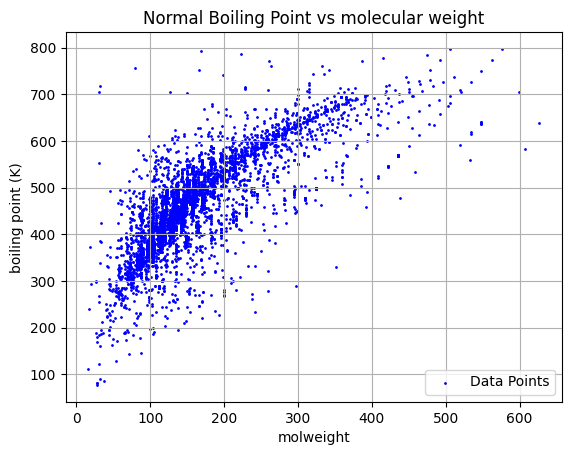

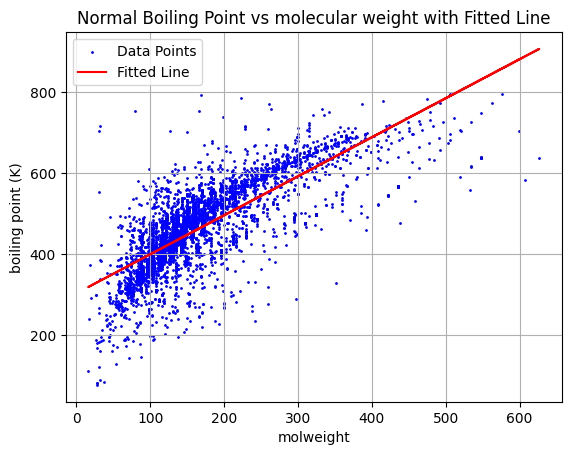

R² Value: 0.5800


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# # Step 1: Download and load the data
data = pd.read_excel("/content/data_file.xlsx")

# Step 2: Extract boiling points and molecular weights
boiling_points = data['boiling point (K)'].values.reshape(-1, 1)  # Column vector
molecular_weights = data['molweight'].values.reshape(-1, 1)      # Column vector

# Step 3: Plot the data
plt.scatter(molecular_weights, boiling_points, color='blue', label='Data Points',s=1)
plt.xlabel('molweight')
plt.ylabel('boiling point (K)')
plt.title('Normal Boiling Point vs molecular weight')
plt.legend()
plt.grid(True)
plt.show()

# Step 4: Fit a straight line using linear regression
model = LinearRegression()
model.fit(molecular_weights, boiling_points)
boiling_points_pred = model.predict(molecular_weights)

# Plot the fitted line
plt.scatter(molecular_weights, boiling_points, color='blue', label='Data Points',s=1)
plt.plot(molecular_weights, boiling_points_pred, color='red', label='Fitted Line')
plt.xlabel('molweight')
plt.ylabel('boiling point (K)')
plt.title('Normal Boiling Point vs molecular weight with Fitted Line')
plt.legend()
plt.grid(True)
plt.show()

# Step 5: Calculate the R² value
r2 = r2_score(boiling_points, boiling_points_pred)
print(f"R² Value: {r2:.4f}")


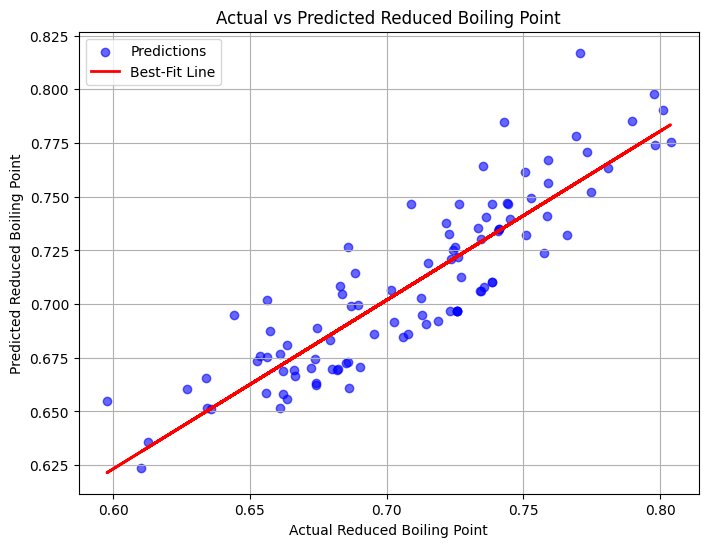

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load dataset
df = pd.read_excel("/content/data_file.xlsx")

# Compute reduced boiling point (Tb/Tc)
df["reduced_boiling_point"] = df["boiling point (K)"] / df["critical temperature (K)"]

# Randomly select 100 samples
sample = df.sample(n=100, random_state=42)

# Construct matrix X (100 × 3)
X = np.ones((100, 3))
X[:, 1] = sample["molweight"].values  # x1 = Molecular weight
X[:, 2] = sample["acentric factor"].values  # x2 = Acentric factor

# Construct vector y (100 × 1)
y = sample["reduced_boiling_point"].values.reshape(-1, 1)

# Compute theta using normal equation: θ = (X^T X)^(-1) X^T y
theta = np.linalg.inv(X.T @ X) @ X.T @ y

# Compute predictions
y_pred = X @ theta  # Predicted reduced boiling points

# Fit a linear regression model for trendline
reg = LinearRegression().fit(y, y_pred)
y_fit = reg.predict(y)

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, color="blue", alpha=0.6, label="Predictions")
plt.plot(y, y_fit, color="red", linewidth=2, label="Best-Fit Line")

# Labels and title
plt.xlabel("Actual Reduced Boiling Point")
plt.ylabel("Predicted Reduced Boiling Point")
plt.title("Actual vs Predicted Reduced Boiling Point")
plt.legend()
plt.grid(True)

# Show plot
plt.show()


In [ ]:
data.info()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score

# Step 1: Load the data
data = pd.read_excel("/content/data_file.xlsx")


# Step 2: Randomly select 100 compounds
np.random.seed(42)  # For reproducibility
random_indices = np.random.choice(data.index, size=100, replace=False)
training_data = data.loc[random_indices]

# Step 3: Create the feature matrix X
X = np.column_stack([
    np.ones(100),  # Column of 1s for the bias term (x0)
    training_data['molweight'].values,  # x1: Molecular Weight
    training_data['acentric factor'].values   # x2: Acentric Factor
])

# Step 4: Create the target vector y (reduced boiling point: Tb / Tc)
y = (training_data['boiling point (K)'] / training_data['critical temperature (K)']).values.reshape(-1, 1)

# Step 5: Solve for the coefficients theta using the normal equation
theta = np.linalg.inv(X.T @ X) @ X.T @ y

# Print the coefficients
print("Coefficients:")
print(f"θ0 (Bias): {theta[0][0]:.4f}")
print(f"θ1 (Molecular Weight): {theta[1][0]:.4f}")
print(f"θ2 (Acentric Factor): {theta[2][0]:.4f}")

# Step 6: Evaluate the quality of the correlation
y_pred = X @ theta  # Predicted values
r2 = r2_score(y, y_pred)  # R² value
print(f"R² Value: {r2:.4f}")

Coefficients:
θ0 (Bias): 0.5958
θ1 (Molecular Weight): 0.0002
θ2 (Acentric Factor): 0.1546
R² Value: 0.7861


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


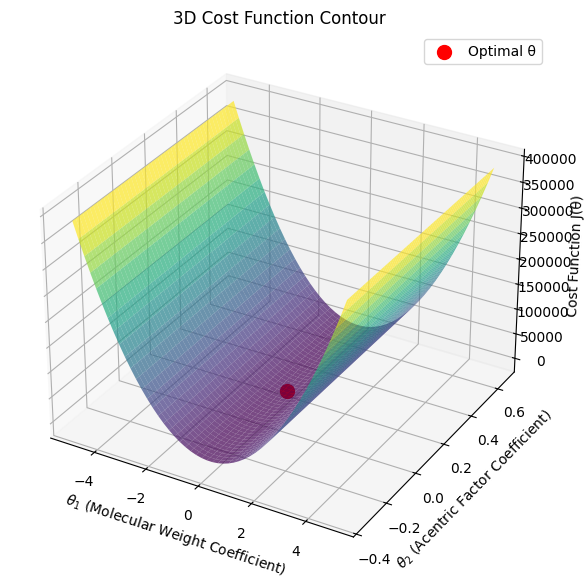

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the dataset (change file path accordingly)

data = pd.read_excel("/content/data_file.xlsx")

# Compute reduced boiling point (Tb/Tc)
data["reduced_boiling_point"] = data["boiling point (K)"] / data["critical temperature (K)"]

# Randomly select 100 samples
sample = data.sample(n=100, random_state=42)

# Construct matrix X (100 × 3)
X = np.ones((100, 3))
X[:, 1] = sample["molweight"].values  # x1 = Molecular weight
X[:, 2] = sample["acentric factor"].values  # x2 = Acentric factor

# Construct vector y (100 × 1)
y = sample["reduced_boiling_point"].values.reshape(-1, 1)

# Compute theta using normal equation: θ = (X^T X)^(-1) X^T y
theta = np.linalg.inv(X.T @ X) @ X.T @ y

# Extract coefficients
theta_0, theta_1, theta_2 = theta.flatten()

# Define the cost function
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X @ theta
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

# Generate a range of θ1 and θ2 values
theta_1_vals = np.linspace(theta_1 - 5, theta_1 + 5, 50)
theta_2_vals = np.linspace(theta_2 - 0.5, theta_2 + 0.5, 50)

# Compute cost values for each (theta_1, theta_2) pair
J_vals = np.zeros((len(theta_1_vals), len(theta_2_vals)))

for i, t1 in enumerate(theta_1_vals):
    for j, t2 in enumerate(theta_2_vals):
        theta_test = np.array([theta_0, t1, t2]).reshape(-1, 1)
        J_vals[i, j] = compute_cost(X, y, theta_test)

# Create a 3D contour plot
T1, T2 = np.meshgrid(theta_1_vals, theta_2_vals)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(T1, T2, J_vals.T, cmap="viridis", alpha=0.7)

# Mark the minimum point
ax.scatter(theta_1, theta_2, compute_cost(X, y, theta), color='red', marker='o', s=100, label="Optimal θ")

# Labels
ax.set_xlabel(r'$\theta_1$ (Molecular Weight Coefficient)')
ax.set_ylabel(r'$\theta_2$ (Acentric Factor Coefficient)')
ax.set_zlabel('Cost Function J(θ)')
ax.set_title("3D Cost Function Contour")
ax.legend()

plt.show()




In [8]:
theta_0, theta_1, theta_2

(0.5957965672017045, 0.00020187265344552024, 0.15461602350634313)

In [19]:


import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_excel("/content/data_file.xlsx")

# Extract input features and target variable
features = data[['molweight', 'acentric factor']]
target = data["boiling point (K)"] / data["critical temperature (K)"]

# Standardize the input data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split dataset (90% test, 10% train)
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.9, random_state=42)

# Function to construct the neural network model
def build_model(num_layers=1, units_per_layer=32):
    model = keras.Sequential()
    model.add(keras.layers.Dense(units_per_layer, activation='relu', input_shape=(2,)))  # Input layer

    for _ in range(num_layers - 1):  # Additional hidden layers if needed
        model.add(keras.layers.Dense(units_per_layer, activation='relu'))

    model.add(keras.layers.Dense(1, activation='linear'))  # Output layer

    # Compile the model
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Initialize and train the neural network
nn_model = build_model(num_layers=1, units_per_layer=32)
training_history = nn_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate model performance
test_loss, test_mae = nn_model.evaluate(X_test, y_test)
print(f'MSE on Test Set: {test_loss:.4f}, MAE: {test_mae:.4f}')

# Visualization of training progress
plt.plot(training_history.history['loss'], label='Train Loss')
plt.plot(training_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

# Generate predictions
predictions = nn_model.predict(X_test)
print("Sample Predictions:", predictions[:5].flatten())


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 133ms/step - loss: 0.4349 - mae: 0.6397 - val_loss: 0.2716 - val_mae: 0.4897
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.2305 - mae: 0.4435 - val_loss: 0.1513 - val_mae: 0.3439
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1295 - mae: 0.3116 - val_loss: 0.0991 - val_mae: 0.2718
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0922 - mae: 0.2621 - val_loss: 0.0746 - val_mae: 0.2331
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0635 - mae: 0.2152 - val_loss: 0.0585 - val_mae: 0.2031
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0537 - mae: 0.1993 - val_loss: 0.0455 - val_mae: 0.1778
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0391 - mae: 0.1652 - val_loss: 0.0363 - val_mae: 0.1576
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0333 - mae: 0.1502 - val_loss: 0.0294 - val_mae: 0.1412
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - l

KeyboardInterrupt: 

In [ ]:
y_pred = model.predict(X_test)
print("First 5 Predictions:", y_pred[:].flatten())

In [17]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_excel("/content/data_file.xlsx")

# Extract input and target variables
features = data[['molweight', 'acentric factor']]
target = data["boiling point (K)"] / data["critical temperature (K)"]

# Normalize input data
scaler = StandardScaler()
features = scaler.fit_transform(features)

# Split dataset into training (10%) and testing (90%) sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.9, random_state=42)

# Function to construct the neural network model
def create_model(hidden_layers=1, nodes=16):
    model = keras.Sequential()
    model.add(keras.layers.Dense(nodes, activation='relu', input_shape=(2,)))  # Input layer

    # Add hidden layers dynamically
    for _ in range(hidden_layers - 1):
        model.add(keras.layers.Dense(nodes, activation='relu'))

    model.add(keras.layers.Dense(1, activation='linear'))  # Output layer for regression

    # Compile model using Adam optimizer and Mean Squared Error loss
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Initialize and train the neural network
nn_model = create_model(hidden_layers=1, nodes=32)
training_history = nn_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model's performance
test_loss, test_mae = nn_model.evaluate(X_test, y_test)
print(f'Test MSE: {test_loss:.4f}, Test MAE: {test_mae:.4f}')

# Hyperparameter tuning to find the best configuration
optimal_loss = float('inf')
optimal_mae = float('inf')
best_config = {'hidden_layers': None, 'nodes': None, 'min_loss': None, 'min_mae': None}

# Define a grid of possible parameter values
parameter_options = {'hidden_layers': [1, 2, 3], 'nodes': [2, 4, 6, 8, 12, 16]}

# Iterate through different model architectures
for num_layers in parameter_options['hidden_layers']:
    for n in parameter_options['nodes']:
        print("#" * 100)
        print(f'Model with {num_layers} Hidden Layers and {n} Neurons per Layer')

        # Train and evaluate the model with current parameters
        model = create_model(hidden_layers=num_layers, nodes=n)
        history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

        # Assess model performance
        loss, mae = model.evaluate(X_test, y_test)
        print(f'Validation MSE: {loss:.4f}, Validation MAE: {mae:.4f}')

        # Keep track of the best-performing model
        if loss < optimal_loss:
            optimal_loss = loss
            optimal_mae = mae
            best_config = {'hidden_layers': num_layers, 'nodes': n, 'min_loss': optimal_loss, 'min_mae': optimal_mae}

# Display the best hyperparameter selection
print(f"Optimal Model Configuration:\n"
      f"Hidden Layers: {best_config['hidden_layers']}\n"
      f"Nodes per Layer: {best_config['nodes']}\n"
      f"Lowest MSE: {best_config['min_loss']}\n")


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.8860 - mae: 0.9129 - val_loss: 0.5697 - val_mae: 0.7412
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.4892 - mae: 0.6861 - val_loss: 0.2960 - val_mae: 0.5376
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.2504 - mae: 0.4917 - val_loss: 0.1464 - val_mae: 0.3714
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.1217 - mae: 0.3332 - val_loss: 0.0753 - val_mae: 0.2497
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0635 - mae: 0.2246 - val_loss: 0.0461 - val_mae: 0.1822
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0408 - mae: 0.1700 - val_loss: 0.0347 - val_mae: 0.1530
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0326 - mae: 0.1478 - val_loss: 0.0292 - val_mae: 0.1376
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0281 - mae: 0.1358 - val_loss: 0.0254 - val_mae: 0.1262
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0236 -

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.4594 - mae: 0.6468 - val_loss: 0.4431 - val_mae: 0.6299
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.4224 - mae: 0.6139 - val_loss: 0.3979 - val_mae: 0.5928
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.3617 - mae: 0.5617 - val_loss: 0.3570 - val_mae: 0.5567
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.3334 - mae: 0.5381 - val_loss: 0.3211 - val_mae: 0.5227
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.3044 - mae: 0.5090 - val_loss: 0.2891 - val_mae: 0.4904
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.2647 - mae: 0.4652 - val_loss: 0.2613 - val_mae: 0.4606
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.2530 - mae: 0.4525 - val_loss: 0.2372 - val_mae: 0.4338
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2205 - mae: 0.4161 - val_loss: 0.2163 - val_mae: 0.4095
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2021 -

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.9141 - mae: 0.7272 - val_loss: 0.9013 - val_mae: 0.7158
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.8049 - mae: 0.6941 - val_loss: 0.8103 - val_mae: 0.6797
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.7156 - mae: 0.6526 - val_loss: 0.7302 - val_mae: 0.6461
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.6694 - mae: 0.6199 - val_loss: 0.6587 - val_mae: 0.6141
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.5639 - mae: 0.5828 - val_loss: 0.5971 - val_mae: 0.5843
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.5391 - mae: 0.5690 - val_loss: 0.5415 - val_mae: 0.5568
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.5005 - mae: 0.5366 - val_loss: 0.4938 - val_mae: 0.5316
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.4084 - mae: 0.4852 - val_loss: 0.4515 - val_mae: 0.5079
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.3901 -

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.6493 - mae: 0.7735 - val_loss: 0.5593 - val_mae: 0.7193
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.5255 - mae: 0.6987 - val_loss: 0.4424 - val_mae: 0.6412
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.4118 - mae: 0.6200 - val_loss: 0.3496 - val_mae: 0.5703
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.3212 - mae: 0.5462 - val_loss: 0.2745 - val_mae: 0.5045
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.2585 - mae: 0.4892 - val_loss: 0.2146 - val_mae: 0.4434
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.2009 - mae: 0.4294 - val_loss: 0.1681 - val_mae: 0.3876
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.1585 - mae: 0.3748 - val_loss: 0.1332 - val_mae: 0.3383
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.1284 - mae: 0.3268 - val_loss: 0.1076 - val_mae: 0.2962
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0983 -

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.3053 - mae: 0.4876 - val_loss: 0.2537 - val_mae: 0.4310
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2272 - mae: 0.3999 - val_loss: 0.1912 - val_mae: 0.3632
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.1690 - mae: 0.3496 - val_loss: 0.1543 - val_mae: 0.3220
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1309 - mae: 0.2948 - val_loss: 0.1327 - val_mae: 0.2987
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1123 - mae: 0.2769 - val_loss: 0.1177 - val_mae: 0.2818
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.1071 - mae: 0.2644 - val_loss: 0.1053 - val_mae: 0.2676
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0948 - mae: 0.2552 - val_loss: 0.0943 - val_mae: 0.2538
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0892 - mae: 0.2486 - val_loss: 0.0843 - val_mae: 0.2403
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0848 -

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.9971 - mae: 0.8764 - val_loss: 0.9647 - val_mae: 0.8210
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.9040 - mae: 0.7919 - val_loss: 0.7409 - val_mae: 0.6985
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.6112 - mae: 0.6486 - val_loss: 0.5663 - val_mae: 0.5891
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.4597 - mae: 0.5419 - val_loss: 0.4263 - val_mae: 0.4950
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.3701 - mae: 0.4495 - val_loss: 0.3187 - val_mae: 0.4170
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2415 - mae: 0.3842 - val_loss: 0.2373 - val_mae: 0.3523
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.1942 - mae: 0.3165 - val_loss: 0.1791 - val_mae: 0.3014
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.1320 - mae: 0.2667 - val_loss: 0.1368 - val_mae: 0.2604
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0978 -

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.7660 - mae: 0.8188 - val_loss: 0.5874 - val_mae: 0.7052
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.5637 - mae: 0.6876 - val_loss: 0.4375 - val_mae: 0.6007
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.4149 - mae: 0.5859 - val_loss: 0.3184 - val_mae: 0.5118
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.2789 - mae: 0.4758 - val_loss: 0.2241 - val_mae: 0.4304
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.2014 - mae: 0.4086 - val_loss: 0.1486 - val_mae: 0.3522
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1302 - mae: 0.3286 - val_loss: 0.0926 - val_mae: 0.2792
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0804 - mae: 0.2611 - val_loss: 0.0557 - val_mae: 0.2142
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0450 - mae: 0.1904 - val_loss: 0.0353 - val_mae: 0.1640
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0285 -

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.3853 - mae: 0.6000 - val_loss: 0.3627 - val_mae: 0.5765
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.3487 - mae: 0.5658 - val_loss: 0.3218 - val_mae: 0.5427
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.3070 - mae: 0.5326 - val_loss: 0.2829 - val_mae: 0.5082
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.2670 - mae: 0.4985 - val_loss: 0.2443 - val_mae: 0.4711
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.2348 - mae: 0.4664 - val_loss: 0.2092 - val_mae: 0.4346
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.1974 - mae: 0.4262 - val_loss: 0.1780 - val_mae: 0.3989
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1754 - mae: 0.3987 - val_loss: 0.1501 - val_mae: 0.3647
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1420 - mae: 0.3563 - val_loss: 0.1264 - val_mae: 0.3318
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1193 -

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 0.4812 - mae: 0.6881 - val_loss: 0.4280 - val_mae: 0.6492
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.4019 - mae: 0.6284 - val_loss: 0.3469 - val_mae: 0.5837
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.3243 - mae: 0.5628 - val_loss: 0.2712 - val_mae: 0.5140
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.2585 - mae: 0.5008 - val_loss: 0.1985 - val_mae: 0.4345
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.1802 - mae: 0.4094 - val_loss: 0.1385 - val_mae: 0.3510
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.1249 - mae: 0.3305 - val_loss: 0.0996 - val_mae: 0.2855
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0889 - mae: 0.2664 - val_loss: 0.0763 - val_mae: 0.2402
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0658 - mae: 0.2214 - val_loss: 0.0613 - val_mae: 0.2110
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0566 -

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.3579 - mae: 0.5495 - val_loss: 0.2759 - val_mae: 0.4803
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2455 - mae: 0.4514 - val_loss: 0.1805 - val_mae: 0.3799
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.1637 - mae: 0.3592 - val_loss: 0.1219 - val_mae: 0.3044
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.1074 - mae: 0.2815 - val_loss: 0.0860 - val_mae: 0.2498
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0798 - mae: 0.2356 - val_loss: 0.0642 - val_mae: 0.2108
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0647 - mae: 0.2086 - val_loss: 0.0514 - val_mae: 0.1857
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0506 - mae: 0.1804 - val_loss: 0.0442 - val_mae: 0.1717
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0400 - mae: 0.1587 - val_loss: 0.0395 - val_mae: 0.1621
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0381 -

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.4646 - mae: 0.6747 - val_loss: 0.3551 - val_mae: 0.5839
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.3318 - mae: 0.5620 - val_loss: 0.2486 - val_mae: 0.4789
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2256 - mae: 0.4524 - val_loss: 0.1717 - val_mae: 0.3866
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.1533 - mae: 0.3627 - val_loss: 0.1166 - val_mae: 0.3088
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.1036 - mae: 0.2884 - val_loss: 0.0774 - val_mae: 0.2414
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0649 - mae: 0.2179 - val_loss: 0.0524 - val_mae: 0.1906
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0424 - mae: 0.1717 - val_loss: 0.0389 - val_mae: 0.1621
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0349 - mae: 0.1568 - val_loss: 0.0311 - val_mae: 0.1462
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0254 -

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.4841 - mae: 0.6695 - val_loss: 0.3262 - val_mae: 0.5462
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.2835 - mae: 0.5069 - val_loss: 0.1890 - val_mae: 0.4036
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1588 - mae: 0.3733 - val_loss: 0.1056 - val_mae: 0.2886
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0842 - mae: 0.2587 - val_loss: 0.0571 - val_mae: 0.1963
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0386 - mae: 0.1653 - val_loss: 0.0386 - val_mae: 0.1532
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0331 - mae: 0.1401 - val_loss: 0.0292 - val_mae: 0.1359
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0250 - mae: 0.1281 - val_loss: 0.0231 - val_mae: 0.1201
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0209 - mae: 0.1124 - val_loss: 0.0174 - val_mae: 0.1041
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0137 -

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.5153 - mae: 0.7115 - val_loss: 0.3133 - val_mae: 0.5456
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2578 - mae: 0.4854 - val_loss: 0.1639 - val_mae: 0.3698
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1347 - mae: 0.3266 - val_loss: 0.0928 - val_mae: 0.2628
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0775 - mae: 0.2366 - val_loss: 0.0567 - val_mae: 0.1992
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0469 - mae: 0.1786 - val_loss: 0.0351 - val_mae: 0.1552
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0296 - mae: 0.1414 - val_loss: 0.0232 - val_mae: 0.1246
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0210 - mae: 0.1172 - val_loss: 0.0152 - val_mae: 0.0981
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0135 - mae: 0.0906 - val_loss: 0.0102 - val_mae: 0.0778
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0079 -

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.4882 - mae: 0.6969 - val_loss: 0.4713 - val_mae: 0.6848
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.4661 - mae: 0.6809 - val_loss: 0.4459 - val_mae: 0.6660
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.4387 - mae: 0.6604 - val_loss: 0.4215 - val_mae: 0.6474
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.4142 - mae: 0.6417 - val_loss: 0.3981 - val_mae: 0.6291
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.3944 - mae: 0.6255 - val_loss: 0.3757 - val_mae: 0.6110
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.3731 - mae: 0.6086 - val_loss: 0.3542 - val_mae: 0.5932
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.3523 - mae: 0.5911 - val_loss: 0.3337 - val_mae: 0.5757
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.3240 - mae: 0.5669 - val_loss: 0.3142 - val_mae: 0.5585
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.3085 -

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.5200 - mae: 0.7169 - val_loss: 0.4588 - val_mae: 0.6748
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.4421 - mae: 0.6627 - val_loss: 0.4014 - val_mae: 0.6310
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.3914 - mae: 0.6233 - val_loss: 0.3554 - val_mae: 0.5924
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.3465 - mae: 0.5860 - val_loss: 0.3103 - val_mae: 0.5517
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.3037 - mae: 0.5473 - val_loss: 0.2625 - val_mae: 0.5052
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.2537 - mae: 0.4964 - val_loss: 0.2127 - val_mae: 0.4512
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2051 - mae: 0.4437 - val_loss: 0.1628 - val_mae: 0.3889
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.1532 - mae: 0.3775 - val_loss: 0.1171 - val_mae: 0.3195
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1116 -

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 1.1812 - mae: 1.0494 - val_loss: 0.8556 - val_mae: 0.8881
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.7902 - mae: 0.8567 - val_loss: 0.5986 - val_mae: 0.7458
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.5506 - mae: 0.7163 - val_loss: 0.4343 - val_mae: 0.6400
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.3864 - mae: 0.6044 - val_loss: 0.2981 - val_mae: 0.5293
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.2714 - mae: 0.5014 - val_loss: 0.1771 - val_mae: 0.3951
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.1515 - mae: 0.3577 - val_loss: 0.0887 - val_mae: 0.2659
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0762 - mae: 0.2434 - val_loss: 0.0440 - val_mae: 0.1794
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0360 - mae: 0.1587 - val_loss: 0.0248 - val_mae: 0.1269
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0235 -

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.3556 - mae: 0.5879 - val_loss: 0.2617 - val_mae: 0.4974
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.2342 - mae: 0.4682 - val_loss: 0.1602 - val_mae: 0.3796
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.1374 - mae: 0.3480 - val_loss: 0.0924 - val_mae: 0.2745
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0753 - mae: 0.2464 - val_loss: 0.0546 - val_mae: 0.1930
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0461 - mae: 0.1777 - val_loss: 0.0361 - val_mae: 0.1507
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0266 - mae: 0.1326 - val_loss: 0.0269 - val_mae: 0.1302
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0233 - mae: 0.1224 - val_loss: 0.0199 - val_mae: 0.1129
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0176 - mae: 0.1070 - val_loss: 0.0154 - val_mae: 0.0988
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0138 -

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2936 - mae: 0.5255 - val_loss: 0.1756 - val_mae: 0.3885
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1376 - mae: 0.3371 - val_loss: 0.0937 - val_mae: 0.2430
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0720 - mae: 0.2145 - val_loss: 0.0633 - val_mae: 0.1940
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0443 - mae: 0.1684 - val_loss: 0.0456 - val_mae: 0.1686
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0339 - mae: 0.1474 - val_loss: 0.0336 - val_mae: 0.1453
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0252 - mae: 0.1307 - val_loss: 0.0229 - val_mae: 0.1182
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0193 - mae: 0.1103 - val_loss: 0.0148 - val_mae: 0.0938
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0124 - mae: 0.0861 - val_loss: 0.0091 - val_mae: 0.0712
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0073 -

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2996 - mae: 0.5192 - val_loss: 0.1494 - val_mae: 0.3487
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1269 - mae: 0.3151 - val_loss: 0.0890 - val_mae: 0.2452
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0780 - mae: 0.2290 - val_loss: 0.0606 - val_mae: 0.2032
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0474 - mae: 0.1807 - val_loss: 0.0441 - val_mae: 0.1687
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0340 - mae: 0.1517 - val_loss: 0.0310 - val_mae: 0.1416
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0240 - mae: 0.1262 - val_loss: 0.0212 - val_mae: 0.1145
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0160 - mae: 0.1009 - val_loss: 0.0142 - val_mae: 0.0930
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0122 - mae: 0.0897 - val_loss: 0.0095 - val_mae: 0.0749
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0075 -